In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [3]:
df_train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv") 
df_test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv") 

In [4]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
print("Train data shape :- " + str(df_train.shape))
print("Test data shape :- " + str(df_test.shape))

Train data shape :- (8693, 14)
Test data shape :- (4277, 13)


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
n = df_train.nunique(axis=0)  
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64


<AxesSubplot:xlabel='Age', ylabel='Count'>

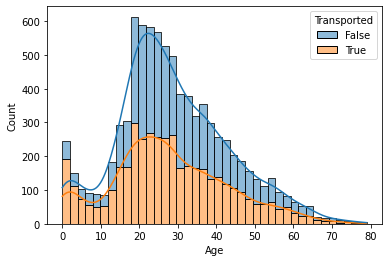

In [10]:
sns.histplot(x='Age', hue='Transported', data=df_train, bins=40, multiple="stack",kde='true')

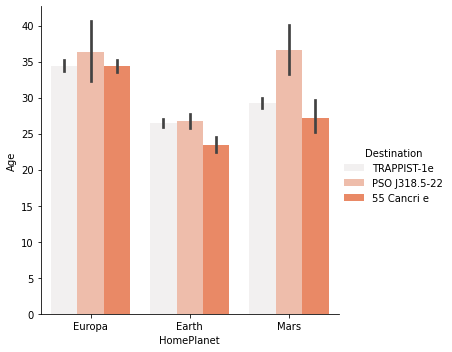

In [11]:
sns.catplot(y="Age", x="HomePlanet", hue="Destination", kind="bar",color='coral', data=df_train)


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

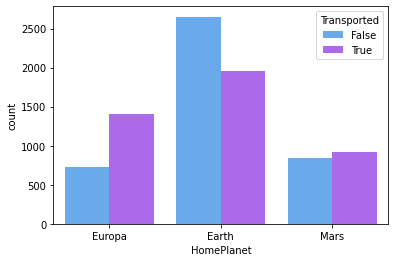

In [12]:
sns.countplot(x="HomePlanet",hue="Transported", palette='cool',data=df_train)

<AxesSubplot:xlabel='Destination', ylabel='count'>

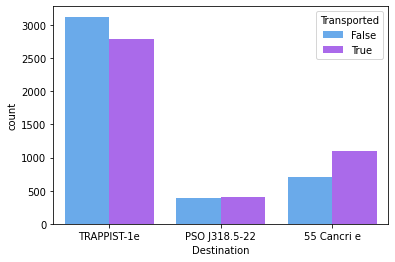

In [13]:
sns.countplot(x="Destination",hue="Transported",palette='cool', data=df_train)

<AxesSubplot:xlabel='HomePlanet', ylabel='Count'>

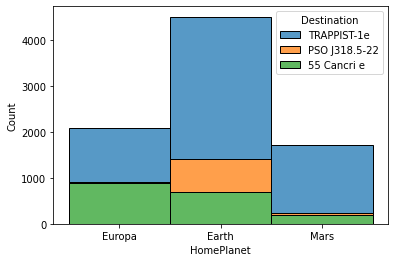

In [14]:
sns.histplot(x="HomePlanet",hue="Destination", data=df_train, multiple="stack")

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

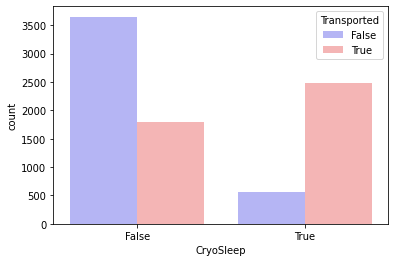

In [15]:
sns.countplot(x="CryoSleep",hue="Transported",palette='bwr', data=df_train)

<AxesSubplot:xlabel='VIP', ylabel='count'>

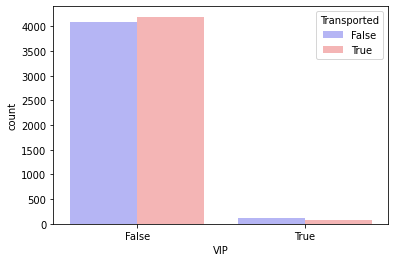

In [16]:
sns.countplot(x="VIP",hue="Transported",palette='bwr',data=df_train)

<AxesSubplot:xlabel='Age', ylabel='RoomService'>

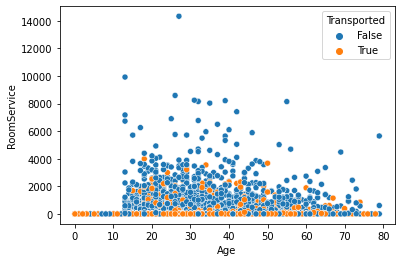

In [17]:
sns.scatterplot(data=df_train, x='Age', y='RoomService',hue="Transported",legend="full")

<AxesSubplot:xlabel='Age', ylabel='Spa'>

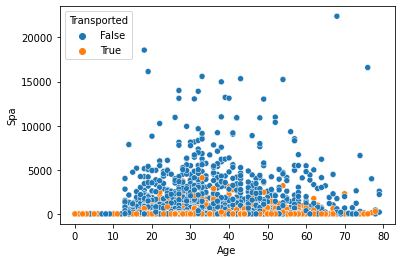

In [18]:
sns.scatterplot(data=df_train, x='Age', y='Spa',hue="Transported",legend="full")

<AxesSubplot:xlabel='Age', ylabel='VRDeck'>

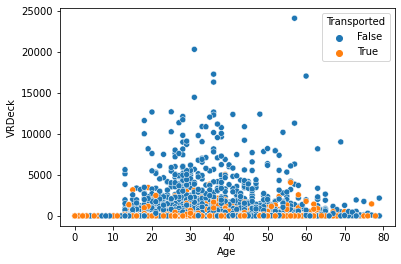

In [19]:
sns.scatterplot(data=df_train, x='Age', y='VRDeck',hue="Transported",legend="full")

<AxesSubplot:xlabel='Age', ylabel='FoodCourt'>

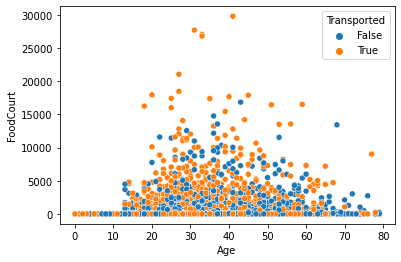

In [20]:
sns.scatterplot(data=df_train, x='Age', y='FoodCourt',hue="Transported",legend="full")

<AxesSubplot:xlabel='FoodCourt'>

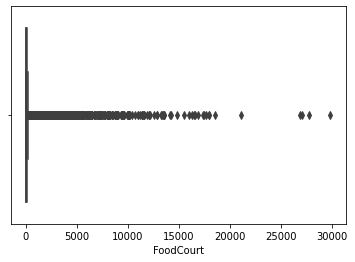

In [21]:
sns.boxplot(x='FoodCourt',data=df_train)

<AxesSubplot:xlabel='ShoppingMall'>

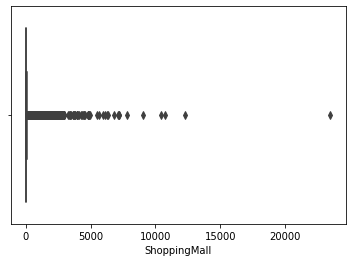

In [22]:
sns.boxplot(x='ShoppingMall',data=df_train)

<AxesSubplot:xlabel='Spa'>

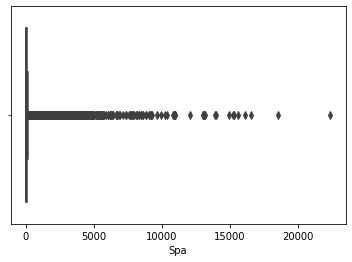

In [23]:
sns.boxplot(x='Spa',data=df_train)

<AxesSubplot:xlabel='VRDeck'>

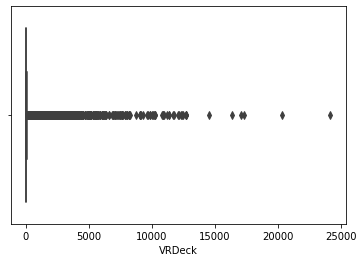

In [24]:
sns.boxplot(x='VRDeck',data=df_train)

<AxesSubplot:xlabel='RoomService'>

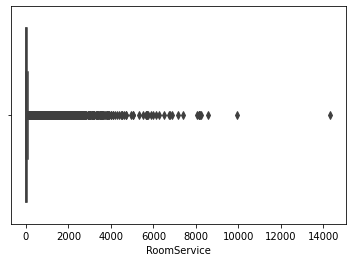

In [25]:
sns.boxplot(x='RoomService',data=df_train)

In [26]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [27]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [28]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy="median" )
imputer.fit(df_train[imputer_cols])
df_train[imputer_cols] = imputer.transform(df_train[imputer_cols])
df_test[imputer_cols] = imputer.transform(df_test[imputer_cols])
df_train["HomePlanet"].fillna('Z', inplace=True)
df_test["HomePlanet"].fillna('Z', inplace=True)

label_cols = ["HomePlanet", "CryoSleep","Cabin", "Destination" ,"VIP"]
def label_encoder(train,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train_df ,test_df = label_encoder(df_train,df_test ,label_cols)

In [29]:
cor = df_train.corr()
cor

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,1.000000,0.068726,-0.425569,0.042618,0.122943,0.044255,0.192189,0.056321,0.088970,0.045252,0.035631,0.107755
CryoSleep,0.068726,1.000000,0.100689,-0.085571,-0.068816,-0.023407,-0.216689,-0.182029,-0.188532,-0.178382,-0.171721,0.404716
Cabin,-0.425569,0.100689,1.000000,0.113260,-0.236994,-0.053158,-0.073802,-0.260056,-0.067709,-0.180768,-0.210865,-0.052604
Destination,0.042618,-0.085571,0.113260,1.000000,-0.004342,-0.024905,0.043735,-0.109558,0.022982,-0.052915,-0.072850,-0.104817
Age,0.122943,-0.068816,-0.236994,-0.004342,1.000000,0.032434,0.068629,0.127390,0.033148,0.120946,0.099590,-0.074233
VIP,0.044255,-0.023407,-0.053158,-0.024905,0.032434,1.000000,0.038011,0.054756,-0.009496,0.020355,0.054623,-0.014260
RoomService,0.192189,-0.216689,-0.073802,0.043735,0.068629,0.038011,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124
FoodCourt,0.056321,-0.182029,-0.260056,-0.109558,0.127390,0.054756,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583
ShoppingMall,0.088970,-0.188532,-0.067709,0.022982,0.033148,-0.009496,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391
Spa,0.045252,-0.178382,-0.180768,-0.052915,0.120946,0.020355,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545


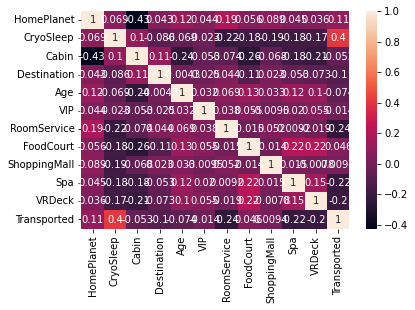

In [30]:
ax = sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8693 non-null   int64  
 4   Destination   8693 non-null   int64  
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   int64  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int64(5), object(2)
memory usage: 891.5+ KB


In [32]:
X_train = df_train[["PassengerId","HomePlanet","CryoSleep","Cabin","Destination","Age","VIP","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]]
y_train = df_train["Transported"]
X_test = df_test.drop("Name",axis=1)

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8693 non-null   int64  
 4   Destination   8693 non-null   int64  
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   int64  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
dtypes: float64(6), int64(5), object(1)
memory usage: 815.1+ KB


In [34]:
# le = LabelEncoder()
# X_train["PassengerId"] = le.fit_transform(X_train["PassengerId"])
# X_test["PassengerId"]= le.fit_transform(X_test["PassengerId"])

In [35]:
model = RandomForestClassifier(max_depth=10, random_state=42)

In [36]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [37]:
y_pred = model.predict(X_test)

In [38]:
y_pred

array([ True, False,  True, ...,  True,  True,  True])

In [39]:
submission = pd.DataFrame(
    {'PassengerId':X_test["PassengerId"],'Transported': y_pred},columns=['PassengerId', 'Transported'])
submission.to_csv("submission.csv",index=False)